 Task specification. In this task, you should write and submit:– a program for time series forecating based on a recurrent neural network model,– a report on your program

• Approach: You should train, evaluate and compare three models — LSTM, GRU and
 bidirectional LSTM

• Dataset: You should select a dataset which is appropriate for this task


In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainilcoder/netflix-stock-price-prediction")

print(path)

/kaggle/input/netflix-stock-price-prediction


The Dataset contains data from 5th Feb 2018 to 5th Feb 2022

In [18]:
import pandas as pd

netflix_data = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")
# print out the first 5 rows of the dataset
netflix_data.head()

'''
As we can observe from here that
Open -> price at which stock opened
High-> Today's High
Low-> Today's Low
Close-> Close price at the end of the day
Adj Close-> Close price  adjusted according to the history of the stock
Volume-> Number of shares traded

'''


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [20]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [19]:
# use describe method to observe the data
netflix_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1421 - val_loss: 0.0759
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0404 - val_loss: 0.0619
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0381 - val_loss: 0.0705
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0391 - val_loss: 0.0503
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0345 - val_loss: 0.0480
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/

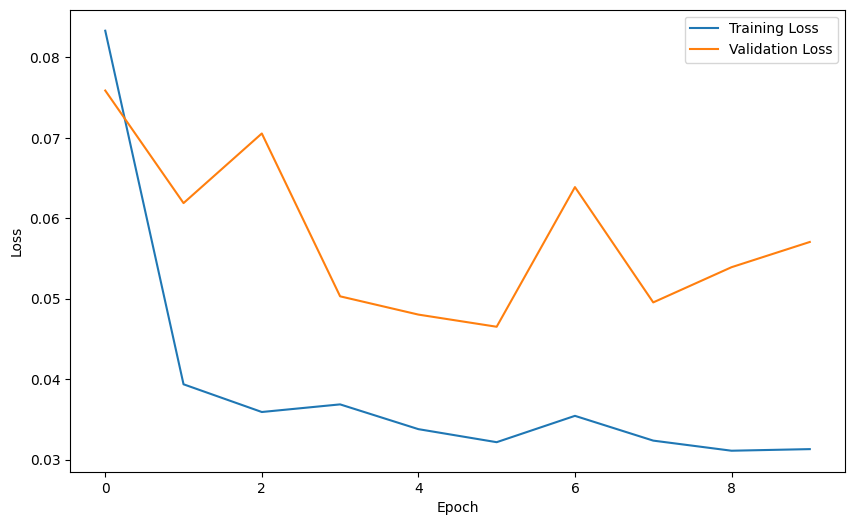

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1310 - val_loss: 0.0496
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0310 - val_loss: 0.0471
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0276 - val_loss: 0.0380
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0251 - val_loss: 0.0297
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0230 - val_loss: 0.0317
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0229 - val_loss: 0.0260
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0220 - val_loss: 0.0267
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0230 - val_loss: 0.0496
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0220 - val_loss: 0.0267
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0211 - val_loss: 0.0358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Model Name :GRU
The average loss in each epoch: [0.07380607724189758, 0

<Figure size 640x480 with 0 Axes>

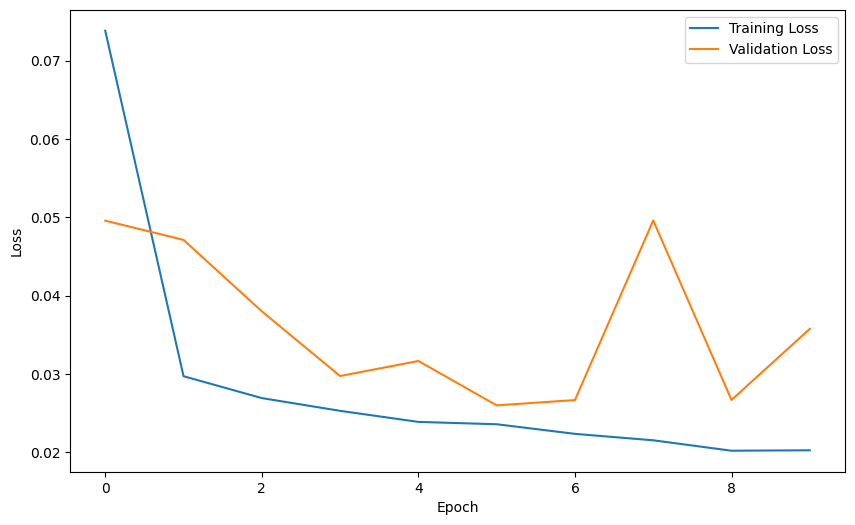

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1413 - val_loss: 0.0974
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0484 - val_loss: 0.0641
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0294 - val_loss: 0.0399
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0289 - val_loss: 0.0375
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0295 - val_loss: 0.0358
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0281 - val_loss: 0.0350
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0252 - val_loss: 0.0360
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0241 - val_loss: 0.0565
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0295 - val_loss: 0.0315
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0244 - val_loss: 0.0311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
Model Name :BiLSTM
The average loss in each epoch: [0.09977053850889206

<Figure size 640x480 with 0 Axes>

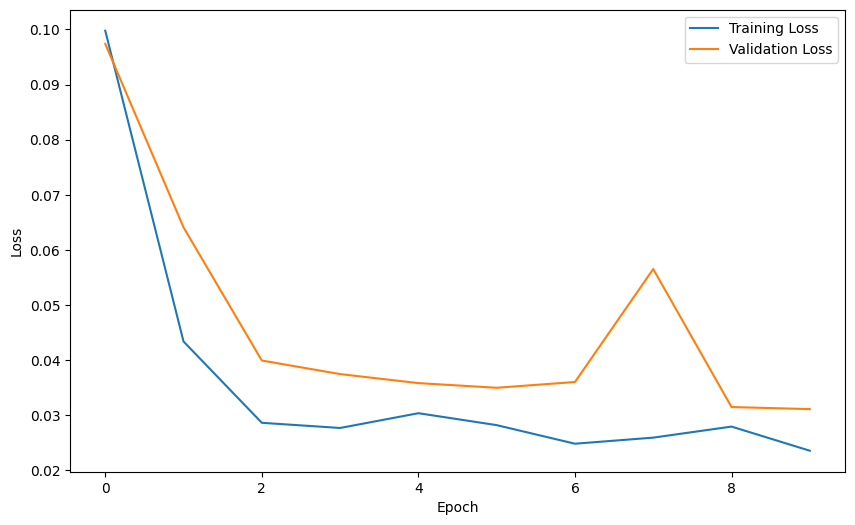

<Figure size 640x480 with 0 Axes>

In [35]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional,LSTM, Dense, Input,GRU
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt


def load_data():
  path = kagglehub.dataset_download("jainilcoder/netflix-stock-price-prediction")
  data = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")
  data.info()
  return data

def pre_process_data(data,features,target):
  scaler_X=MinMaxScaler(feature_range=(0,1))
  scaler_y=MinMaxScaler(feature_range=(0,1))

  X_scaled=scaler_X.fit_transform(data[features])
  y_scaled=scaler_y.fit_transform(data[target])

  return X_scaled,y_scaled,scaler_X,scaler_y

def create_sequences(features,target,sequence_length):
  X,y=[],[]
  for i in range(len(features) - sequence_length-1):
        X.append(features[i:i+sequence_length])
        y.append(target[i+sequence_length])
  X,y=np.array(X),np.array(y)
  return X,y


def model_builder(model_type, input_shape):
  model=Sequential()

  model.add(Input(shape=input_shape))

  if model_type=='LSTM':
    model.add(LSTM(units=50,  return_sequences=True))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(LSTM(units=50))

  elif model_type=="GRU":
    model.add(GRU(units=50, return_sequences=True))
    model.add(GRU(units=50, return_sequences=True))
    model.add(GRU(units=50))

  elif model_type=="BiLSTM":
    model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=50)))

  model.add(Dense(units=1))
  model.compile(optimizer='adam', loss='mean_absolute_error')
  return model



def trainAndevaluate(model,X_train,y_train,X_test,y_test,scaler_y,input_sequence,model_name):
  history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

  y_pred_next_value=model.predict(input_sequence)
  y_pred_next_value=scaler_y.inverse_transform(y_pred_next_value)

  y_pred_all=model.predict(X_test)
  y_pred_all=scaler_y.inverse_transform(y_pred_all)

  y_test_true=scaler_y.inverse_transform(y_test)

  overall_loss = np.mean(np.abs(y_pred_all - y_test_true))


  print(f"Model Name :{model_name}")
  print(f"The average loss in each epoch: {history.history['loss']}")
  print(f"The total val loss : {history.history['val_loss']}")
  print(f"Overall Loss : {overall_loss}")
  print(f"Predicted Next Value : {y_pred_next_value}")
  return history


def plot_loss(history):
   plt.figure(figsize=(10,6))
   plt.plot(history.history['loss'], label='Training Loss')
   plt.plot(history.history['val_loss'], label='Validation Loss')
   plt.xlabel('Epoch')
   plt.ylabel('Loss')
   plt.legend()
   plt.show()
   plt.savefig('loss_plot.png')



def main():

  sequence_length=60
  data=load_data()
  features=['Open','High','Low','Volume','Close']
  target=['Adj Close']

  X_scaled,y_scaled,scaler_X,scaler_y=pre_process_data(data,features,target)
  X,y=create_sequences(X_scaled,y_scaled,sequence_length)

  train_size=int(len(X)*0.8)
  X_train,X_test=X[:train_size],X[train_size:]
  y_train,y_test=y[:train_size],y[train_size:]

  input_sequence = X[-1].reshape(1, sequence_length, len(features))
  for model_type in ['LSTM','GRU','BiLSTM']:
    model=model_builder(model_type,(sequence_length,len(features)))
    history=trainAndevaluate(model,X_train,y_train,X_test,y_test,scaler_y,input_sequence,model_type)
    plot_loss(history)


main()

overal loss= the sum of the absolute value of all the instances losses